# Quickstart (API)


This document is for teach the basic usage of `coolbox` API and explain some basic conceptions.
It's can be a good start point to use CoolBox.

Interactive online version: [Binder](https://mybinder.org/v2/gh/GangCaoLab/CoolBox/HEAD?filepath=docs%2Fsource%2Fquick_start_API.ipynb)

Firstly import all components from `coolbox.api`, and check your CoolBox version.

In [1]:
# change working directory
import os
os.chdir("../../")
print(f"Current working directory: {os.path.abspath(os.curdir)}")

Current working directory: /home/nanguage/DATA2/Dropbox/workspace/CoolBox


In [2]:
import coolbox
from coolbox.api import *

In [3]:
coolbox.__version__

'0.2.5'

## Data preparation
### Testing dataset

Here, we use [a small testing dataset](https://github.com/GangCaoLab/CoolBox/tree/master/tests/test_data) for convenient.
This dataset contains files in differnet file formats,
and they are in same genome range(chr9:4000000-6000000) of a reference genome (hg19).

In [4]:
!ls -lh tests/test_data/

total 27M
-rw-rw-r-- 1 nanguage nanguage 787K 10月 27 09:50 bam_chr9_4000000_6000000.bam
-rw-rw-r-- 1 nanguage nanguage 5.8K 11月 13 16:05 bam_chr9_4000000_6000000.bam.bai
-rw-rw-r-- 1 nanguage nanguage 8.6K 10月 27 09:50 bed_chr9_4000000_6000000.bed
-rw-rw-r-- 1 nanguage nanguage 2.2K 11月 13 16:05 bed_chr9_4000000_6000000.bed.bgz
-rw-rw-r-- 1 nanguage nanguage  220 11月 13 16:05 bed_chr9_4000000_6000000.bed.bgz.tbi
-rw-rw-r-- 1 nanguage nanguage  18K 10月 27 20:35 bedgraph_chr9_4000000_6000000.bg
-rw-rw-r-- 1 nanguage nanguage  264 10月 28 10:11 bedpe_chr9_4000000_6000000.bedpe
-rw-rw-r-- 1 nanguage nanguage  147 11月 13 16:05 bedpe_chr9_4000000_6000000.bedpe.bgz
-rw-rw-r-- 1 nanguage nanguage  160 11月 13 16:05 bedpe_chr9_4000000_6000000.bedpe.bgz.px2
-rw-rw-r-- 1 nanguage nanguage  31K 10月 27 09:50 bigwig_chr9_4000000_6000000.bw
-rw-rw-r-- 1 nanguage nanguage  27M 10月 27 09:50 cool_chr9_4000000_6000000.mcool
-rw-rw-r-- 1 nanguage nanguage 535K 10月 27 09:50 gtf_chr9_4000000_6000000.gtf
-rw-r

In [5]:
# Here we define const values for reference files easily later
DATA_DIR = "tests/test_data"
TEST_RANGE = "chr9:4000000-6000000"
RANGE_MARK = "chr9_4000000_6000000"

## Track is the basic element

In CoolBox ploting system, "Track" is the basic element. If you have used genome browser like [UCSC Genome Browser](https://genome.ucsc.edu/) or [WashU EpiGenome Browser](https://epigenomegateway.wustl.edu/), you must know what it is.

Basically, "Track" is a image what is related to a piece of continuous region on the reference genome. The most common track is the bigWig track, If you have read some papers about epigenomics you must have seen some figures like this:

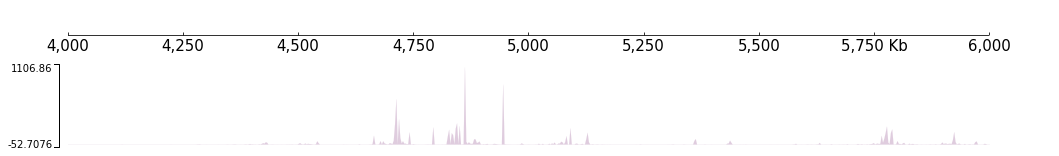

In [6]:
bigwig_path = f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw"

frame = XAxis() + BigWig(bigwig_path)  # input a file path
frame.plot(TEST_RANGE)  # input a genome range

Actually, bigWig is just one kind of track, there are other kinds of tracks in CoolBox, for display other kind of genomic data like long range genome interaction from ChIA-PET and genome contact matrix from Hi-C.


### Track types

Now, CoolBox support the following track types:


| Track Type  | Relevant file format | Description |
| :---------: | :---------: | :---------: |
| XAxis | `None` | X axis of genome. |
| Spacer | `None` | For add vertical space between two tracks. |
| BigWig | [.bigwig](https://genome.ucsc.edu/goldenPath/help/bigWig.html#:~:text=BigWig%20files%20are%20created%20from,to%20the%20Genome%20Browser%20server.) | Track of bigWig file. |
| BedGraph | [.bedgraph](https://genome.ucsc.edu/goldenPath/help/bedgraph.html) | Track of bedgraph file. |
| BAM | [.bam](https://samtools.github.io/hts-specs/SAMv1.pdf) | BAM track for visualize the coverage or alignment. |
| BED | [.bed](https://genome.ucsc.edu/FAQ/FAQformat.html#format1) | Track of Bed file, for visualization genome annotation,like refSeq genes and chromatin states. |
| GTF | [.gtf](https://genome.ucsc.edu/FAQ/FAQformat.html#format4) | Track of GTF file, for visualize gene annotation. |
| TADs | .bed | Track for show TAD(topologically associated domains). |
| Arcs | .pairs, .bedpe | Show the chromosome interactions get from ChIA-PET or Hi-C loop data. |
| BEDPE | [.bedpe](https://bedtools.readthedocs.io/en/latest/content/general-usage.html#bedpe-format) | Same to Arcs, specific to BEDPE file |
| Pairs | [.pairs](https://github.com/4dn-dcic/pairix/blob/master/pairs_format_specification.md) | Same to Arcs, specific to Pairs file |
| HiCMat | .cool, .mcool, .hic | Show the chromosome contact matrix from Hi-C data. |
| Cool | [.cool, .mcool](https://github.com/mirnylab/cooler) | Same to HiCMat, specific to cooler's `.cool` or `.mcool` format. |
| DotHiC | [.hic](https://github.com/aidenlab/juicer/wiki/Data#hic-files) | Same to HiCMat, specific to juicer `.hic` file format. |
| Virtual4C | .cool, .mcool, .hic | Virtual 4C track, using Hi-C data to mimic 4C. |
| HiCDiff | .cool, .mcool, .hic | Show the difference between two contact matrix. |
| SNP | .tsv | Track for show SNPs Manhattan plot. Input file is a tab-split file, contain SNP's chrom, position, pvalue information. |


### Other kinds of tracks:

#### BED track :
BED track used to show the genome annotation information like RefSeq or chromatin states.
Here we have the RefSeq data, it can be visualized with `coolbox.api.BED`:

Visualize RefSeq with CoolBox:

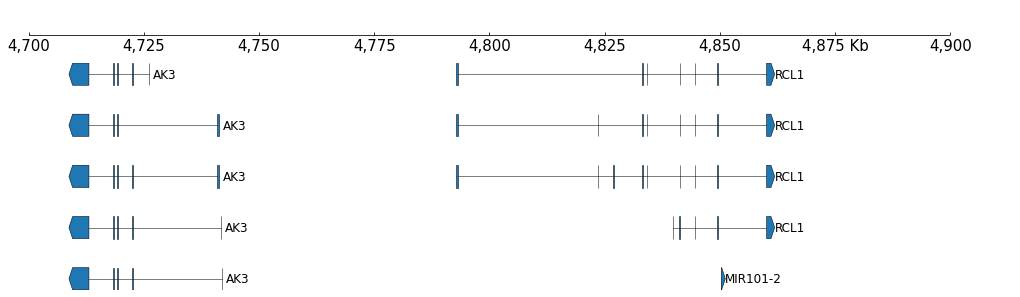

In [7]:
frame = XAxis() + BED(f"{DATA_DIR}/bed_{RANGE_MARK}.bed") + TrackHeight(8)

frame.plot("chr9:4700000-4900000")

#### GTFtrack :
GTF track is also for visualize gene annotations:

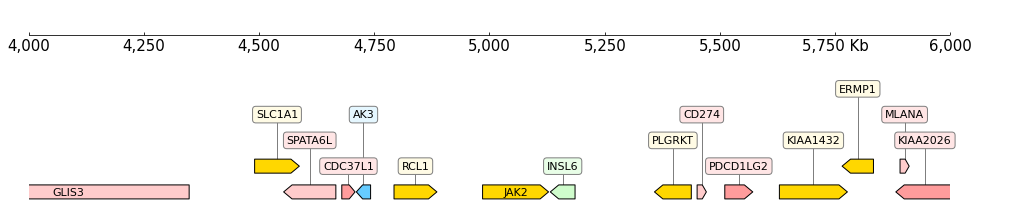

In [8]:
frame = XAxis() + GTF(f"{DATA_DIR}/gtf_{RANGE_MARK}.gtf") + TrackHeight(5)

frame.plot(TEST_RANGE)

#### Hi-C (.cool) Track

CoolBox also support Hi-C data visualization.

CoolBox support two types of input format for Hi-C matrix data, 
[.cool](https://github.com/GangCaoLab/CoolBox/wiki/Hi-C#cool) 
and [.hic](https://github.com/GangCaoLab/CoolBox/wiki/Hi-C#dothic) file.

Their API is very similar, 
You can use `CoolBox.api.HiCMat` to visualize both.

Here we use a `.cool` file as example.

##### `multi-cool(.mcool)` for multiple resolution Hi-C matrix

Cooler file support multi-resolution interaction matrix storage (normally file name ends with `.mcool`), this feature allow us take appropriate resolution matrix data depending on the corresponding genome region size, it let program respond fast when plot the hic matrix.

The multi-resolution cooler file is suggested, you can use `cooler zoomify` command to create multi-resolution cooler file from a single resolution cooler file.

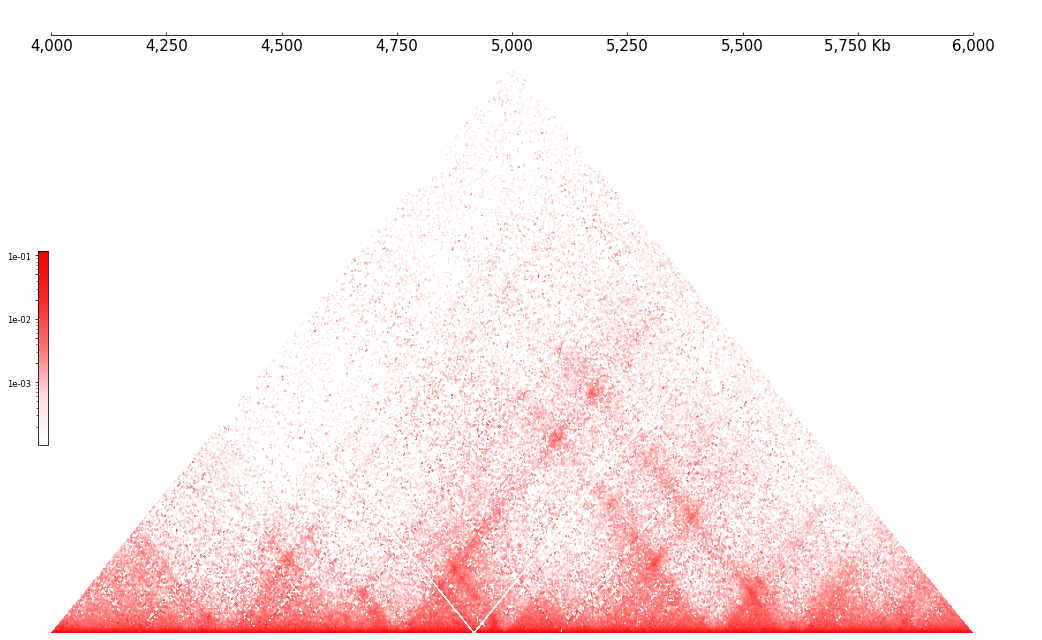

In [9]:
frame = XAxis() + HiCMat(f"{DATA_DIR}/cool_{RANGE_MARK}.mcool")
frame.plot(TEST_RANGE)

Default Hi-C Track will be plot in `triangular` style, it also can be `matrix` or `window` style.

Just change the specify the `style` parameter, when create Cool instance, like this: 

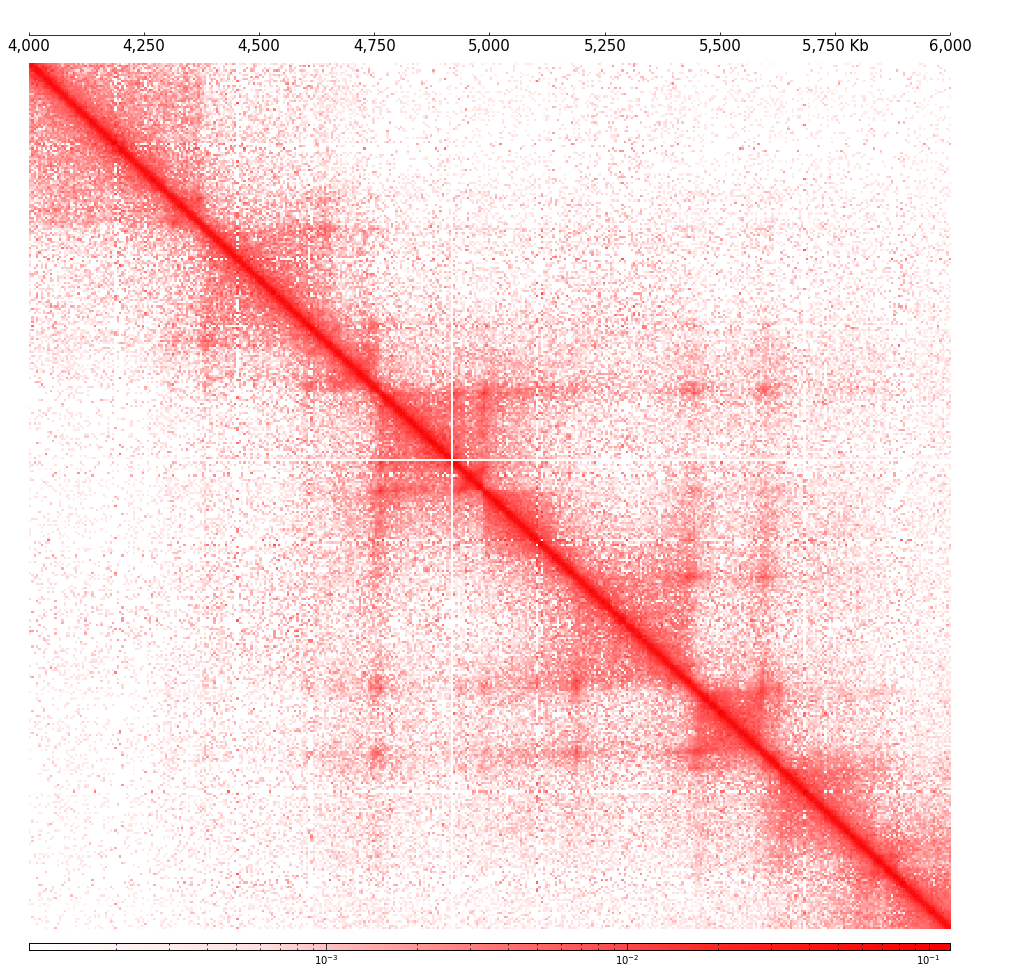

In [10]:
frame = XAxis() + \
    HiCMat(f"{DATA_DIR}/cool_{RANGE_MARK}.mcool", style='matrix', color_bar='horizontal')
frame.plot(TEST_RANGE)

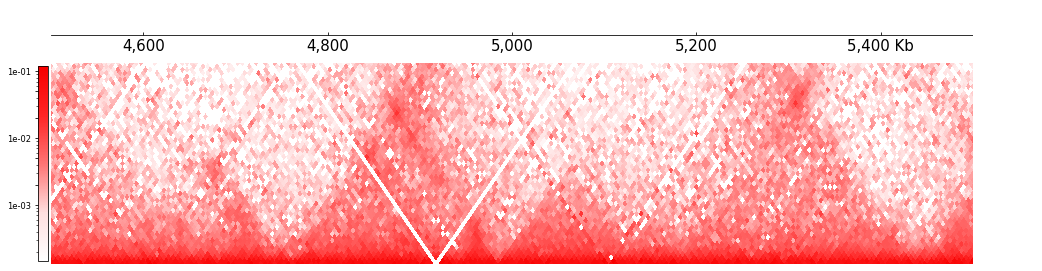

In [11]:
frame = XAxis() + HiCMat(f"{DATA_DIR}/cool_{RANGE_MARK}.mcool", style='window', depth_ratio=0.3)
frame.plot("chr9:4500000-5500000")

`Cool` show balanced matrix as default, if you want to show the unbalanced matrix, you can set as:

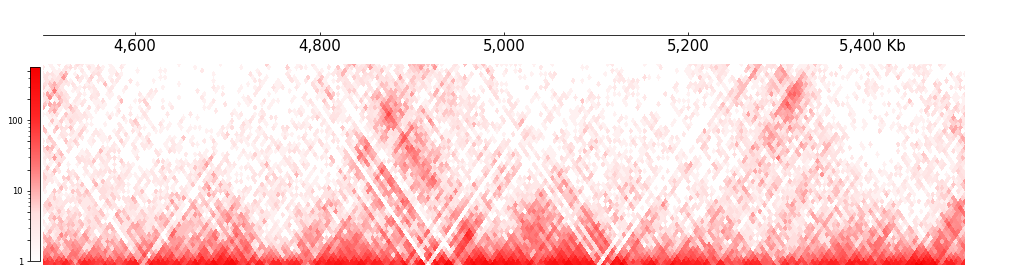

In [12]:
frame = XAxis() + HiCMat(f"{DATA_DIR}/cool_{RANGE_MARK}.mcool", style='window', depth_ratio=0.3, balance=False) + MinValue(1)
frame.plot("chr9:4500000-5500000")

#### Arcs Track

Another kind of important technology like ChIA-PET or HiChIP, 
it can produce many long-range genome-wide chromatin interactions.

And, some times, Hi-C contact matrix is too informative to understand, 
we only need some most important interactions from it, 
We use some tools like [HICCUPS](https://github.com/theaidenlab/juicer/wiki/HiCCUPS) call the most significant interactions, or "Peaks" from contact matrix.

In either case, Arcs Track can be used to visulize the data.
Arcs track accept `.pairs` or `.bedpe` format:

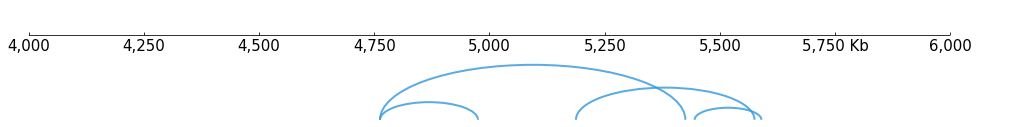

In [13]:
# BEDPE
frame = XAxis() + Arcs(f"{DATA_DIR}/bedpe_{RANGE_MARK}.bedpe", line_width=2)
frame.plot(TEST_RANGE)

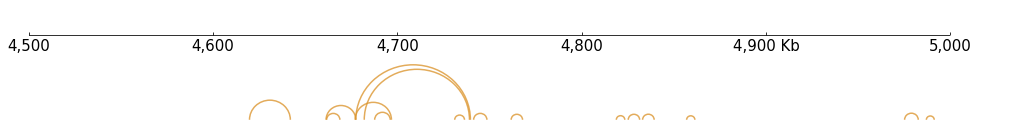

In [14]:
# Pairs
frame = XAxis() + Arcs(f"{DATA_DIR}/pairs_{RANGE_MARK}.pairs", line_width=1.5)
frame.plot("chr9:4500000-5000000")

## Compose Tracks to Frame

In CoolBox you can compose tracks with "+" operator, as shown above, compose XAxis track and a bigwig track to a frame object:

```
frame = XAxis() + BigWig("data/K562_RNASeq.bigWig")
```

Frame is a higher level object, denote a set of relevant tracks. We can use a long "+" expression compose a complex Frame.

In [15]:
cool1 = Cool(f"{DATA_DIR}/cool_{RANGE_MARK}.mcool")

frame = XAxis() + \
    cool1 + Title("Hi-C(.cool)") + \
    Spacer(0.5) + \
    Virtual4C(cool1, "chr9:4986000-4986000") + Title("Virtual4C") + \
    Spacer(0.5) + \
    BAM(f"{DATA_DIR}/bam_{RANGE_MARK}.bam") + Title("BAM Coverage") +\
    Spacer(0.5) + \
    Arcs(f"{DATA_DIR}/bedpe_{RANGE_MARK}.bedpe") + Inverted() + Title("Arcs(BEDPE)") + \
    Spacer(0.1) + \
    Arcs(f"{DATA_DIR}/pairs_{RANGE_MARK}.pairs") + Inverted() + Title("Arcs(Pairs)") + \
    GTF(f"{DATA_DIR}/gtf_{RANGE_MARK}.gtf", length_ratio_thresh=0.005) + TrackHeight(6) + Title("GTF Annotation") + \
    Spacer(0.1) + \
    BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") + Title("BigWig")

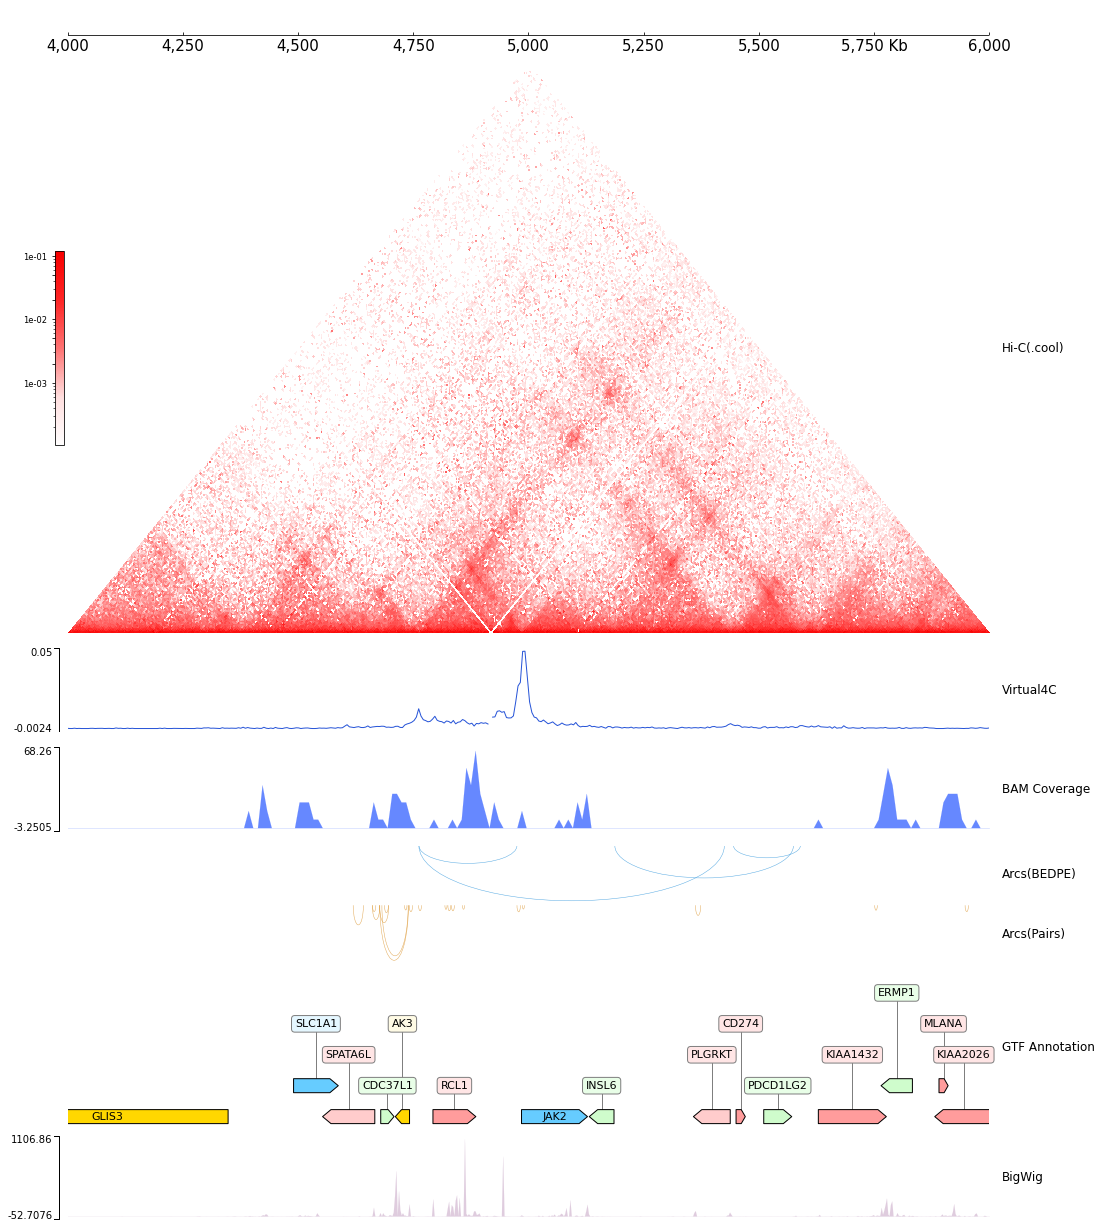

In [16]:
frame.plot(TEST_RANGE)

## Adjust Tracks and Frame with Feature

Maybe you have noticed that, in the complex expression above, there some element witch added with 
Tracks is not a Track, for example, the `TrackHeight`, `Title` and `Title`.

These elements is `Feature`, it is represent the features of the Track.

For example, we set the color and track height feature of a bigWig track.

In [17]:
frame = XAxis() + \
        BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") + \
        Color("#ce00ce") + TrackHeight(8)

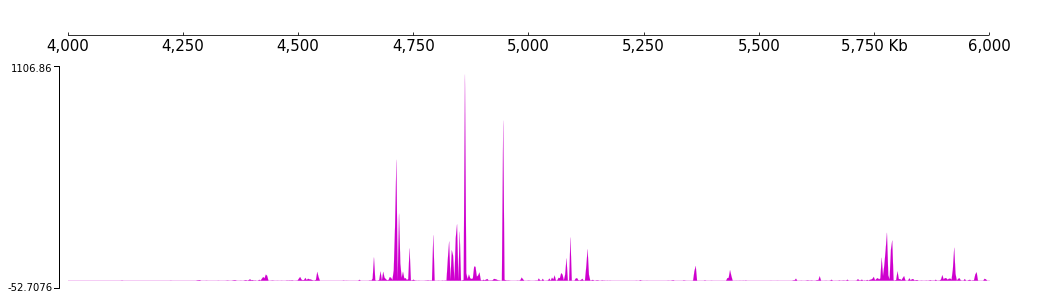

In [18]:
frame.plot(TEST_RANGE)

And we can adjust the min value and max value of the track:

In [19]:
frame = XAxis() + \
        BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") + \
        Color("#ce00ce") + TrackHeight(5) + \
        MinValue(0) + MaxValue(50)

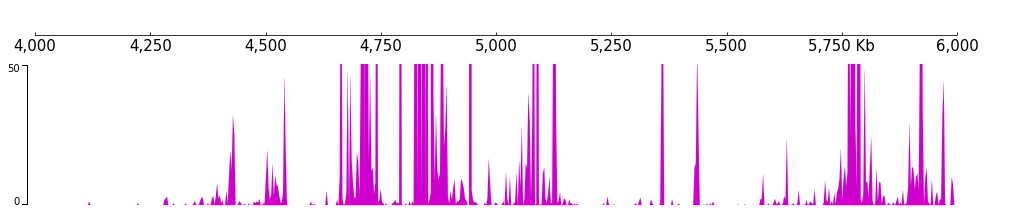

In [20]:
frame.plot(TEST_RANGE)

### with statement

By the way, there are one useful trick, you can use Feature with "`with statement`", like:

In [21]:
with Color("#fd9c6b"):
    frame1 = XAxis() +\
             BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
             BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw")  +\
             BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw")

with Color("#66ccff"):
    frame2 = BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
             BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw")
        
frame = frame1 + frame2

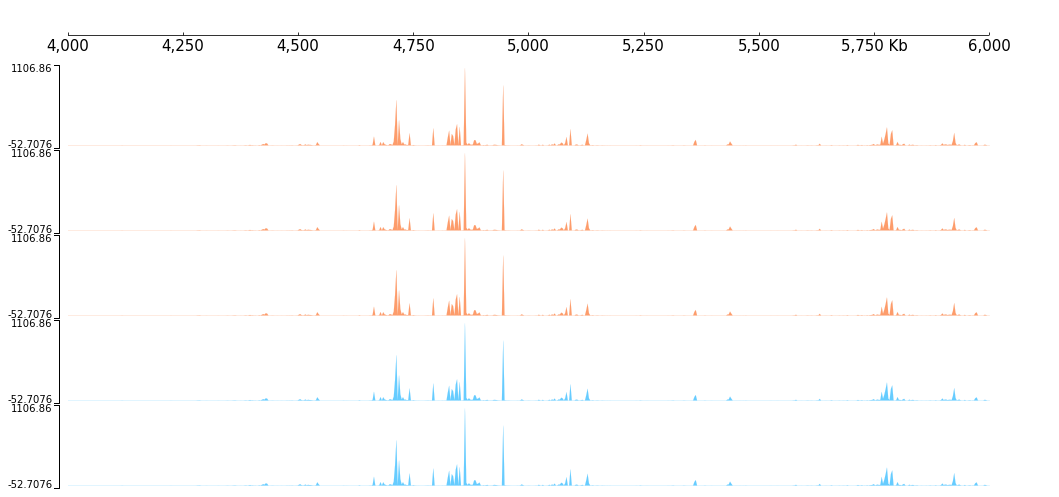

In [22]:
frame.plot(TEST_RANGE)

As shown above, any tracks created inside the "`with statement`" will have the specified feature.

use this trick, we can simplify the complex expression:

## Coverage

Some times we need to draw some graphics above the original figure, for example, 
the vertical lines and highlight regions. CoolBox has another kinds of element, the `Coverage`.
We can add coverage with track, after added to track, coverage will plot upper the track when track is ploted.

### Vertical lines:

In [23]:
locus = [("chr9", 4500000), ("chr9", 5000000)]
frame = XAxis() + BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") + Vlines(locus, line_width=2)

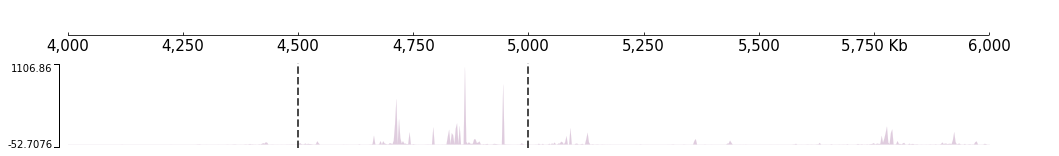

In [24]:
frame.plot(TEST_RANGE)

Like the `Feature` if you want a set of tracks with same coverge, you can use the "`with statement`":

In [25]:
with Vlines(locus, line_width=2):
    frame = BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
            BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
            BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw")
frame = XAxis() + frame + XAxis()

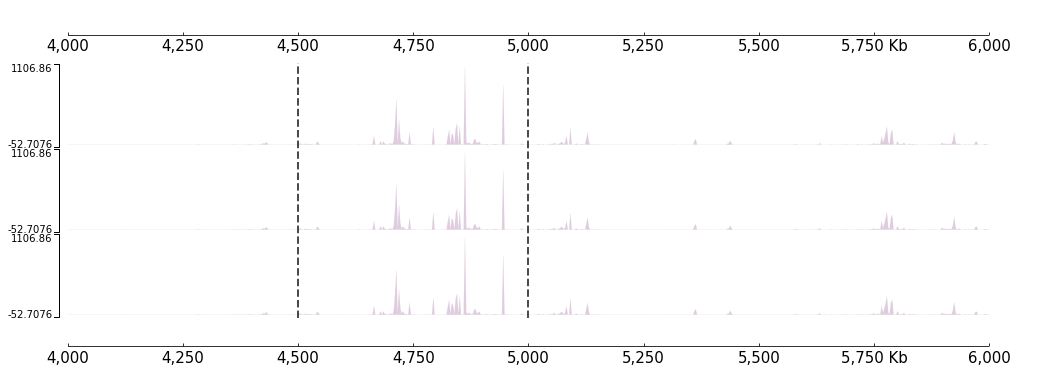

In [26]:
frame.plot(TEST_RANGE)

Or, you can also use `*` operator do this: 

In [27]:
frame = BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
        BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
        BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw")
frame = frame * Vlines(locus, line_width=2)
frame = XAxis() + frame + XAxis()

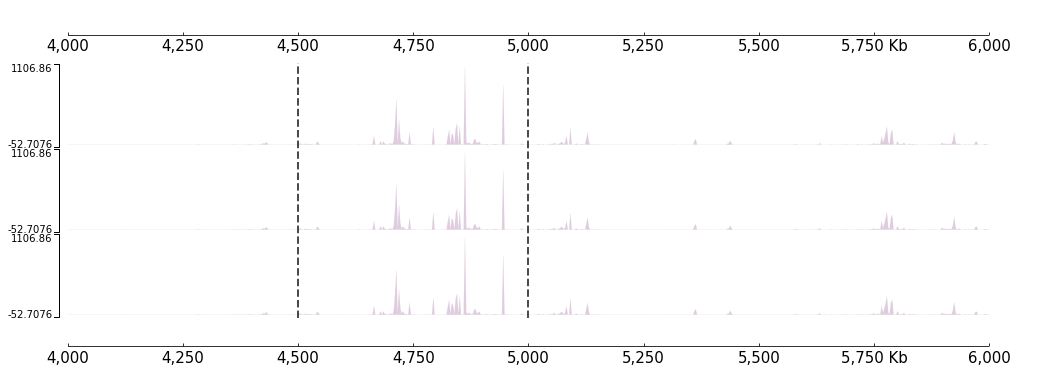

In [28]:
frame.plot(TEST_RANGE)

### HighLights:

In [29]:
regions= ["chr9:4600000-5000000", "chr9:5750000-5950000"]

highlights = HighLights(regions, color="green", alpha=0.05)

with highlights, Color("#aa5cff"):
    frame = BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
            BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
            BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw")

frame = XAxis() + frame + XAxis()

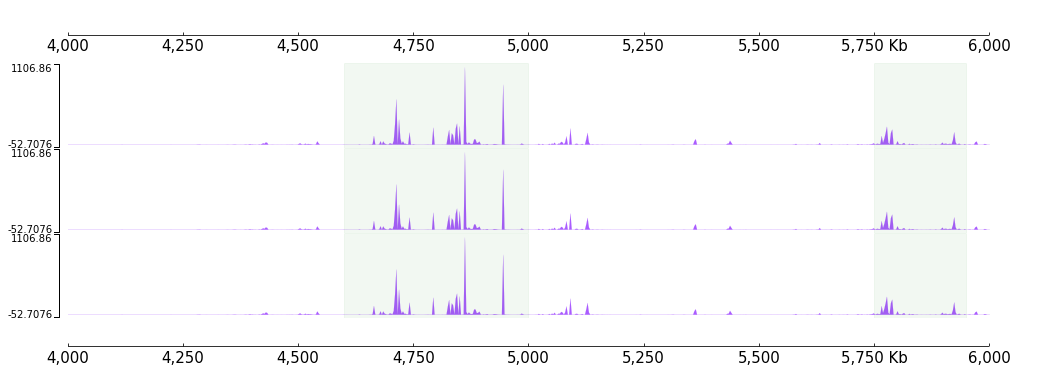

In [30]:
frame.plot(TEST_RANGE)

## Explore Genomic Data with `coolbox.api.Browser`

When you want to explore the data, you will change the genome region window very frequently.
Under these circumstances, when you want to do the operations like "move right", "move left", "zoom in", "zoom out",
if you use above `Frame.plot` API to plot the figure, you must change parameters and run again.
It is troublesome and boring.
In order to solve this problem, CoolBox impletmented a simple GUI with [ipywidgets](https://ipywidgets.readthedocs.io/).

You can crate a `Browser` instance with a composed frame, and call `.show()` method to show the browser.


In [31]:
cool1 = Cool(f"{DATA_DIR}/cool_{RANGE_MARK}.mcool")

frame = XAxis() + \
    cool1 + Title("Hi-C(.cool)") + \
    Spacer(0.5) + \
    Virtual4C(cool1, "chr9:4986000-4986000") + Title("Virtual4C") + \
    Spacer(0.5) + \
    BAM(f"{DATA_DIR}/bam_{RANGE_MARK}.bam") + Title("BAM Coverage") +\
    Spacer(0.5) + \
    Arcs(f"{DATA_DIR}/bedpe_{RANGE_MARK}.bedpe") + Inverted() + Title("Arcs(BEDPE)") + \
    Spacer(0.1) + \
    Arcs(f"{DATA_DIR}/pairs_{RANGE_MARK}.pairs") + Inverted() + Title("Arcs(Pairs)") + \
    GTF(f"{DATA_DIR}/gtf_{RANGE_MARK}.gtf", length_ratio_thresh=0.005) + TrackHeight(6) + Title("GTF Annotation") + \
    Spacer(0.1) + \
    BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") + Title("BigWig")

bsr = Browser(frame)
bsr.goto(TEST_RANGE)

**Note: browser is valid only when the jupyter kernel is active**

In [32]:
bsr.show()

## Fetch precise data use `.fetch_data` API

In CoolBox, data and figure is bound together with a single Python object. So, you can fetch precise data of what you see in the figure.

Call the `.fetch_data` method of `Browser` or `Frame`, will return an `collection.OrderDict` which store many `pandas.Dataframe` object correspond to each tracks in the browser or frame , and the data is only about the current genome region.

In [33]:
bsr.tracks

OrderedDict([('XAxis.21', <coolbox.core.track.pseudo.XAxis at 0x7f11649dded0>),
             ('Cool.6',
              <coolbox.core.track.hicmat.cool.Cool at 0x7f115e736810>),
             ('Spacer.6',
              <coolbox.core.track.pseudo.Spacer at 0x7f11678a1c90>),
             ('Virtual4C.2',
              <coolbox.core.track.v4c.Virtual4C at 0x7f115e736990>),
             ('Spacer.7',
              <coolbox.core.track.pseudo.Spacer at 0x7f115e7369d0>),
             ('BAM.2', <coolbox.core.track.bam.BAM at 0x7f115e736b10>),
             ('Spacer.8',
              <coolbox.core.track.pseudo.Spacer at 0x7f115e736b50>),
             ('BEDPE.3', <coolbox.core.track.arcs.BEDPE at 0x7f115e736910>),
             ('Spacer.9',
              <coolbox.core.track.pseudo.Spacer at 0x7f115ebabc10>),
             ('Pairs.3', <coolbox.core.track.arcs.Pairs at 0x7f115e736c10>),
             ('GTF.3', <coolbox.core.track.gtf.GTF at 0x7f115e736cd0>),
             ('Spacer.10',
              <coolbo

In [34]:
current_data = bsr.fetch_data()

In [35]:
list(current_data.keys())

['XAxis.21',
 'Cool.6',
 'Spacer.6',
 'Virtual4C.2',
 'Spacer.7',
 'BAM.2',
 'Spacer.8',
 'BEDPE.3',
 'Spacer.9',
 'Pairs.3',
 'GTF.3',
 'Spacer.10',
 'BigWig.20']

Data of each track related to the current genome range are stored in this dict:

In [36]:
current_cool = current_data['Cool.6']

In [37]:
print(type(current_cool))
current_cool.shape

<class 'numpy.ndarray'>


(401, 401)

In [38]:
current_data['GTF.3'].head(5)

,seqname,source,feature,start,end,score,strand,frame,attribute,gene_name
0,chr9,protein_coding,gene,3824127,4348392,.,-,.,"gene_id ""ENSG00000107249""; gene_name ""GLIS3""; ...",GLIS3
1,chr9,protein_coding,transcript,3824127,4152183,.,-,.,"gene_id ""ENSG00000107249""; transcript_id ""ENST...",GLIS3
2,chr9,protein_coding,transcript,3827698,4299916,.,-,.,"gene_id ""ENSG00000107249""; transcript_id ""ENST...",GLIS3
3,chr9,retained_intron,transcript,3855437,4118017,.,-,.,"gene_id ""ENSG00000107249""; transcript_id ""ENST...",GLIS3
4,chr9,processed_transcript,transcript,3932360,4081361,.,-,.,"gene_id ""ENSG00000107249""; transcript_id ""ENST...",GLIS3


We can do some statics analyze on it. For example count the distribution of interaction count, etc...